Submitted by : Ritesh Pradhan , 22BAI1055

In [90]:
# K-means Clustering
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [91]:
# loading data
df = pd.read_csv('MallCustomers.csv')
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
df.shape

(200, 5)

In [93]:
X = df.iloc[:, [3, 4]].values

Kmeans Using Euclidean Distance

In [94]:
import numpy as np

def k_means(X, k, n_iter=100, metric='euclidean'):
    m, n = X.shape
    centroids = X[np.random.choice(m, k, replace=False)]
    
    # List to store the history of centroids
    centroids_history = [centroids.copy()]
    
    for _ in range(n_iter):
        distances = np.zeros((m, k))
        if metric == 'euclidean':
            for i in range(k):
                distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        elif metric == 'manhattan':
            for i in range(k):
                distances[:, i] = np.sum(np.abs(X - centroids[i]), axis=1)
        elif metric == 'squared_euclidean':
            for i in range(k):
                distances[:, i] = np.sum((X - centroids[i])**2, axis=1)
        elif metric == 'cosine':
            for i in range(k):
                distances[:, i] = 1 - np.dot(X, centroids[i]) / (np.linalg.norm(X, axis=1) * np.linalg.norm(centroids[i]))
        else:
            raise ValueError("Invalid metric")
        
        clusters = np.argmin(distances, axis=1)
        for i in range(k):
            centroids[i] = np.mean(X[clusters == i], axis=0)
        
        # Append the current centroids to the history
        centroids_history.append(centroids.copy())
    
    return clusters, centroids, centroids_history


In [95]:
import numpy as np
import matplotlib.pyplot as plt

def plot_kmeans_clusters(X, metric='euclidean'):
    # Assuming colors is a list of colors for plotting
    colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'pink', 'gray']

    # Determine the number of rows needed for the subplots
    num_rows = 5 # Adjust based on the number of k values you want to plot
    num_cols = 2

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 20))

    for k in range(1, 11):
        # Calculate the row and column indices for the subplot
        row = (k - 1) // num_cols
        col = (k - 1) % num_cols
        
        # Apply K-means clustering
        clusters, centroids,centroids_history = k_means(X, k=k, metric='euclidean')
        
        # Plot the data points colored by their cluster assignment
        for i in range(k):
            axes[row, col].scatter(X[clusters == i, 0], X[clusters == i, 1], c=colors[i], label=f'Cluster {i+1}')
        
        # Plot the centroids
        axes[row, col].scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*', label='Centroids')
        
        axes[row, col].set_xlabel('Annual_Income')
        axes[row, col].set_ylabel('Spending_Score')
        axes[row, col].set_title(f'K-means Clustering with k={k}')
        axes[row, col].legend()

    # Adjust the layout to prevent overlapping of subplot titles
    plt.tight_layout()
    plt.show()  

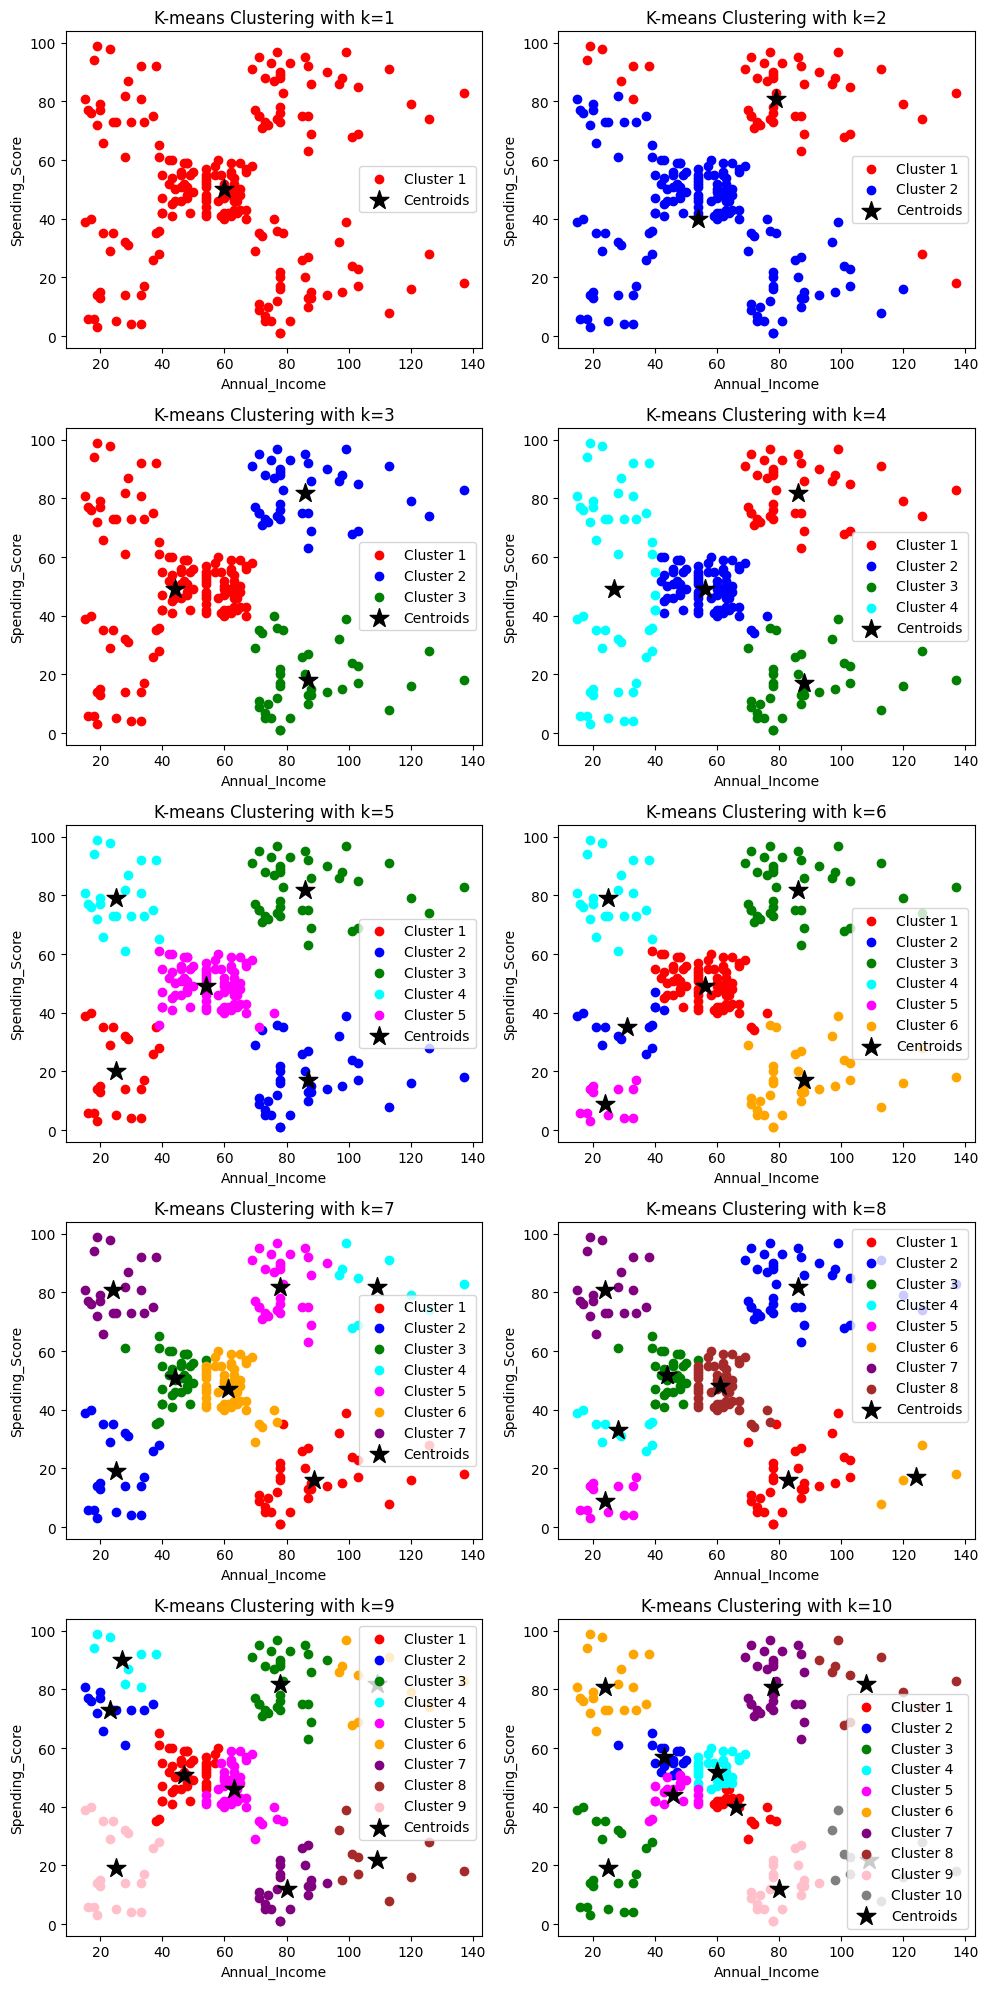

In [96]:
# plotting for different k values for euclidian distance
plot_kmeans_clusters(X, metric='euclidean')

In [97]:
from sklearn.metrics import silhouette_score

def elbow_method(X, max_k=10, metric='euclidean', evaluation_method='wcss'):
    if evaluation_method not in ['wcss', 'silhouette']:
        raise ValueError("evaluation_method must be either 'wcss' or 'silhouette'")
    
    if evaluation_method == 'wcss':
        metric_array = np.zeros(max_k)
        for k in range(1, max_k+1):
            clusters, centroids, centroids_history = k_means(X, k, metric=metric)
            wcss = np.sum([np.sum((X[clusters == i] - centroids[i])**2) for i in range(k)])
            metric_array[k-1] = wcss
        metric_label = 'Sums of squares'
        metric_title = 'Elbow Method (WCSS)'
    elif evaluation_method == 'silhouette':
        metric_array = np.zeros(max_k)
        for k in range(1, max_k+1):
            clusters, centroids, centroids_history = k_means(X, k, metric=metric)
            # Ensure there are at least two unique labels for Silhouette Coefficient
            if len(np.unique(clusters)) < 2:
                print(f"Skipping Silhouette Coefficient calculation for k={k} due to insufficient unique labels.")
                continue
            silhouette_avg = silhouette_score(X, clusters)
            metric_array[k-1] = silhouette_avg
        metric_label = 'Silhouette Coefficient'
        metric_title = 'Silhouette Coefficient'
    
    if evaluation_method == 'wcss':
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, max_k+1), metric_array,'bx-')
        plt.xlabel('Number of Clusters')
        plt.ylabel(metric_label)
        plt.title(metric_title)
        plt.xticks(range(1, max_k+1))
        plt.show()
    
    # Plot the Silhouette Coefficient as a histogram
    if evaluation_method == 'silhouette':
        # Create a figure
        plt.figure(figsize=(10, 6))

        # Set the y-axis limits and ticks
        plt.ylim(0, 1)
        plt.yticks(np.linspace(0, 1, 11)) # 11 ticks for 10 parts

        # Loop through each data point
        for i, value in enumerate(metric_array):
            # Plot a bar for the current data point
            plt.bar(i, value, bottom=0, width=0.8, color='blue')

        # Set labels and title
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Stacked Bar Graph')

        # Adjust x-axis ticks
        plt.xticks(range(len(metric_array)), range(1, len(metric_array)+1))

        # Show the plot
        plt.show()

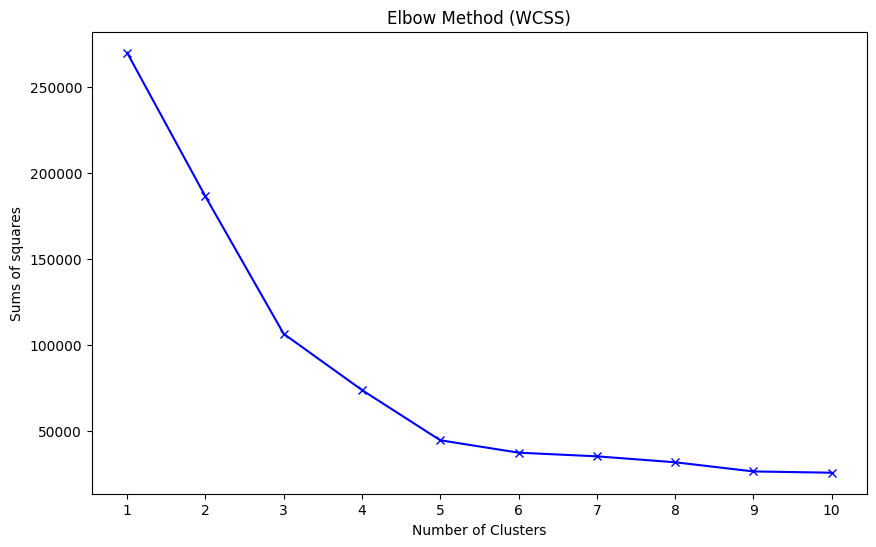

In [98]:
# Apply the Elbow method with WCSS
elbow_method(X, max_k=10, metric='euclidean', evaluation_method='wcss')


Skipping Silhouette Coefficient calculation for k=1 due to insufficient unique labels.


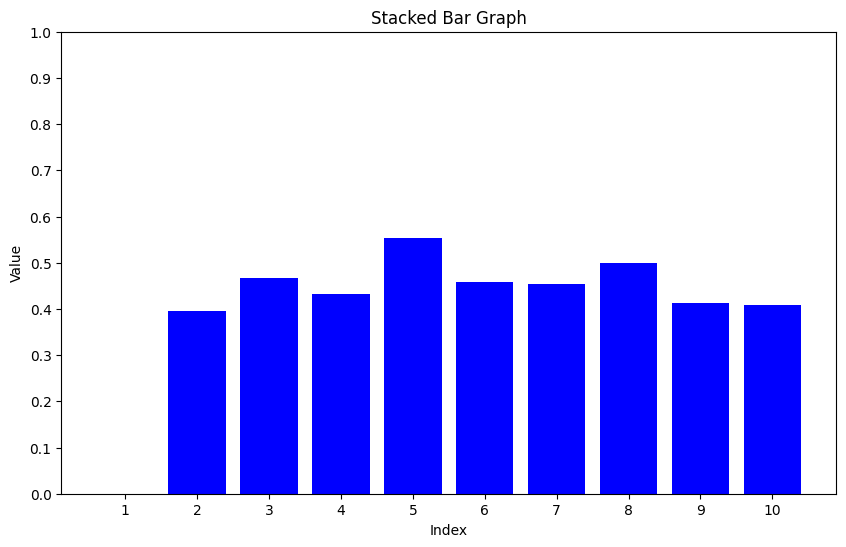

In [99]:

# Apply the Elbow method with Silhouette Coefficient
elbow_method(X, max_k=10, metric='euclidean', evaluation_method='silhouette')

In [100]:
# We can see from both evaluation methods that the optimal number of clusters is 5. This is consistent with the original problem statement, so we can proceed with 5 clusters.

In [101]:
def plot_centroids_history(X, centroids_history, num_epochs=10):
    # Determine the number of rows needed for the subplots
    num_rows = 5 # Adjust based on the number of epochs you want to plot
    num_cols = 2

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Plot the centroids after each of the specified number of epochs
    for i, centroid in enumerate(centroids_history[:num_epochs]):
        row = i // num_cols
        col = i % num_cols
        
        axes[row, col].scatter(X[:, 0], X[:, 1], c='black', label='Data points')
        axes[row, col].scatter(centroid[:, 0], centroid[:, 1], c='red', marker='x', label='Centroids')
        axes[row, col].set_xlabel('Feature 1')
        axes[row, col].set_ylabel('Feature 2')
        axes[row, col].set_title(f'Centroids after Epoch {i+1}')
        axes[row, col].legend()

    # Adjust the layout to prevent overlapping of subplot titles
    plt.tight_layout()
    plt.show()

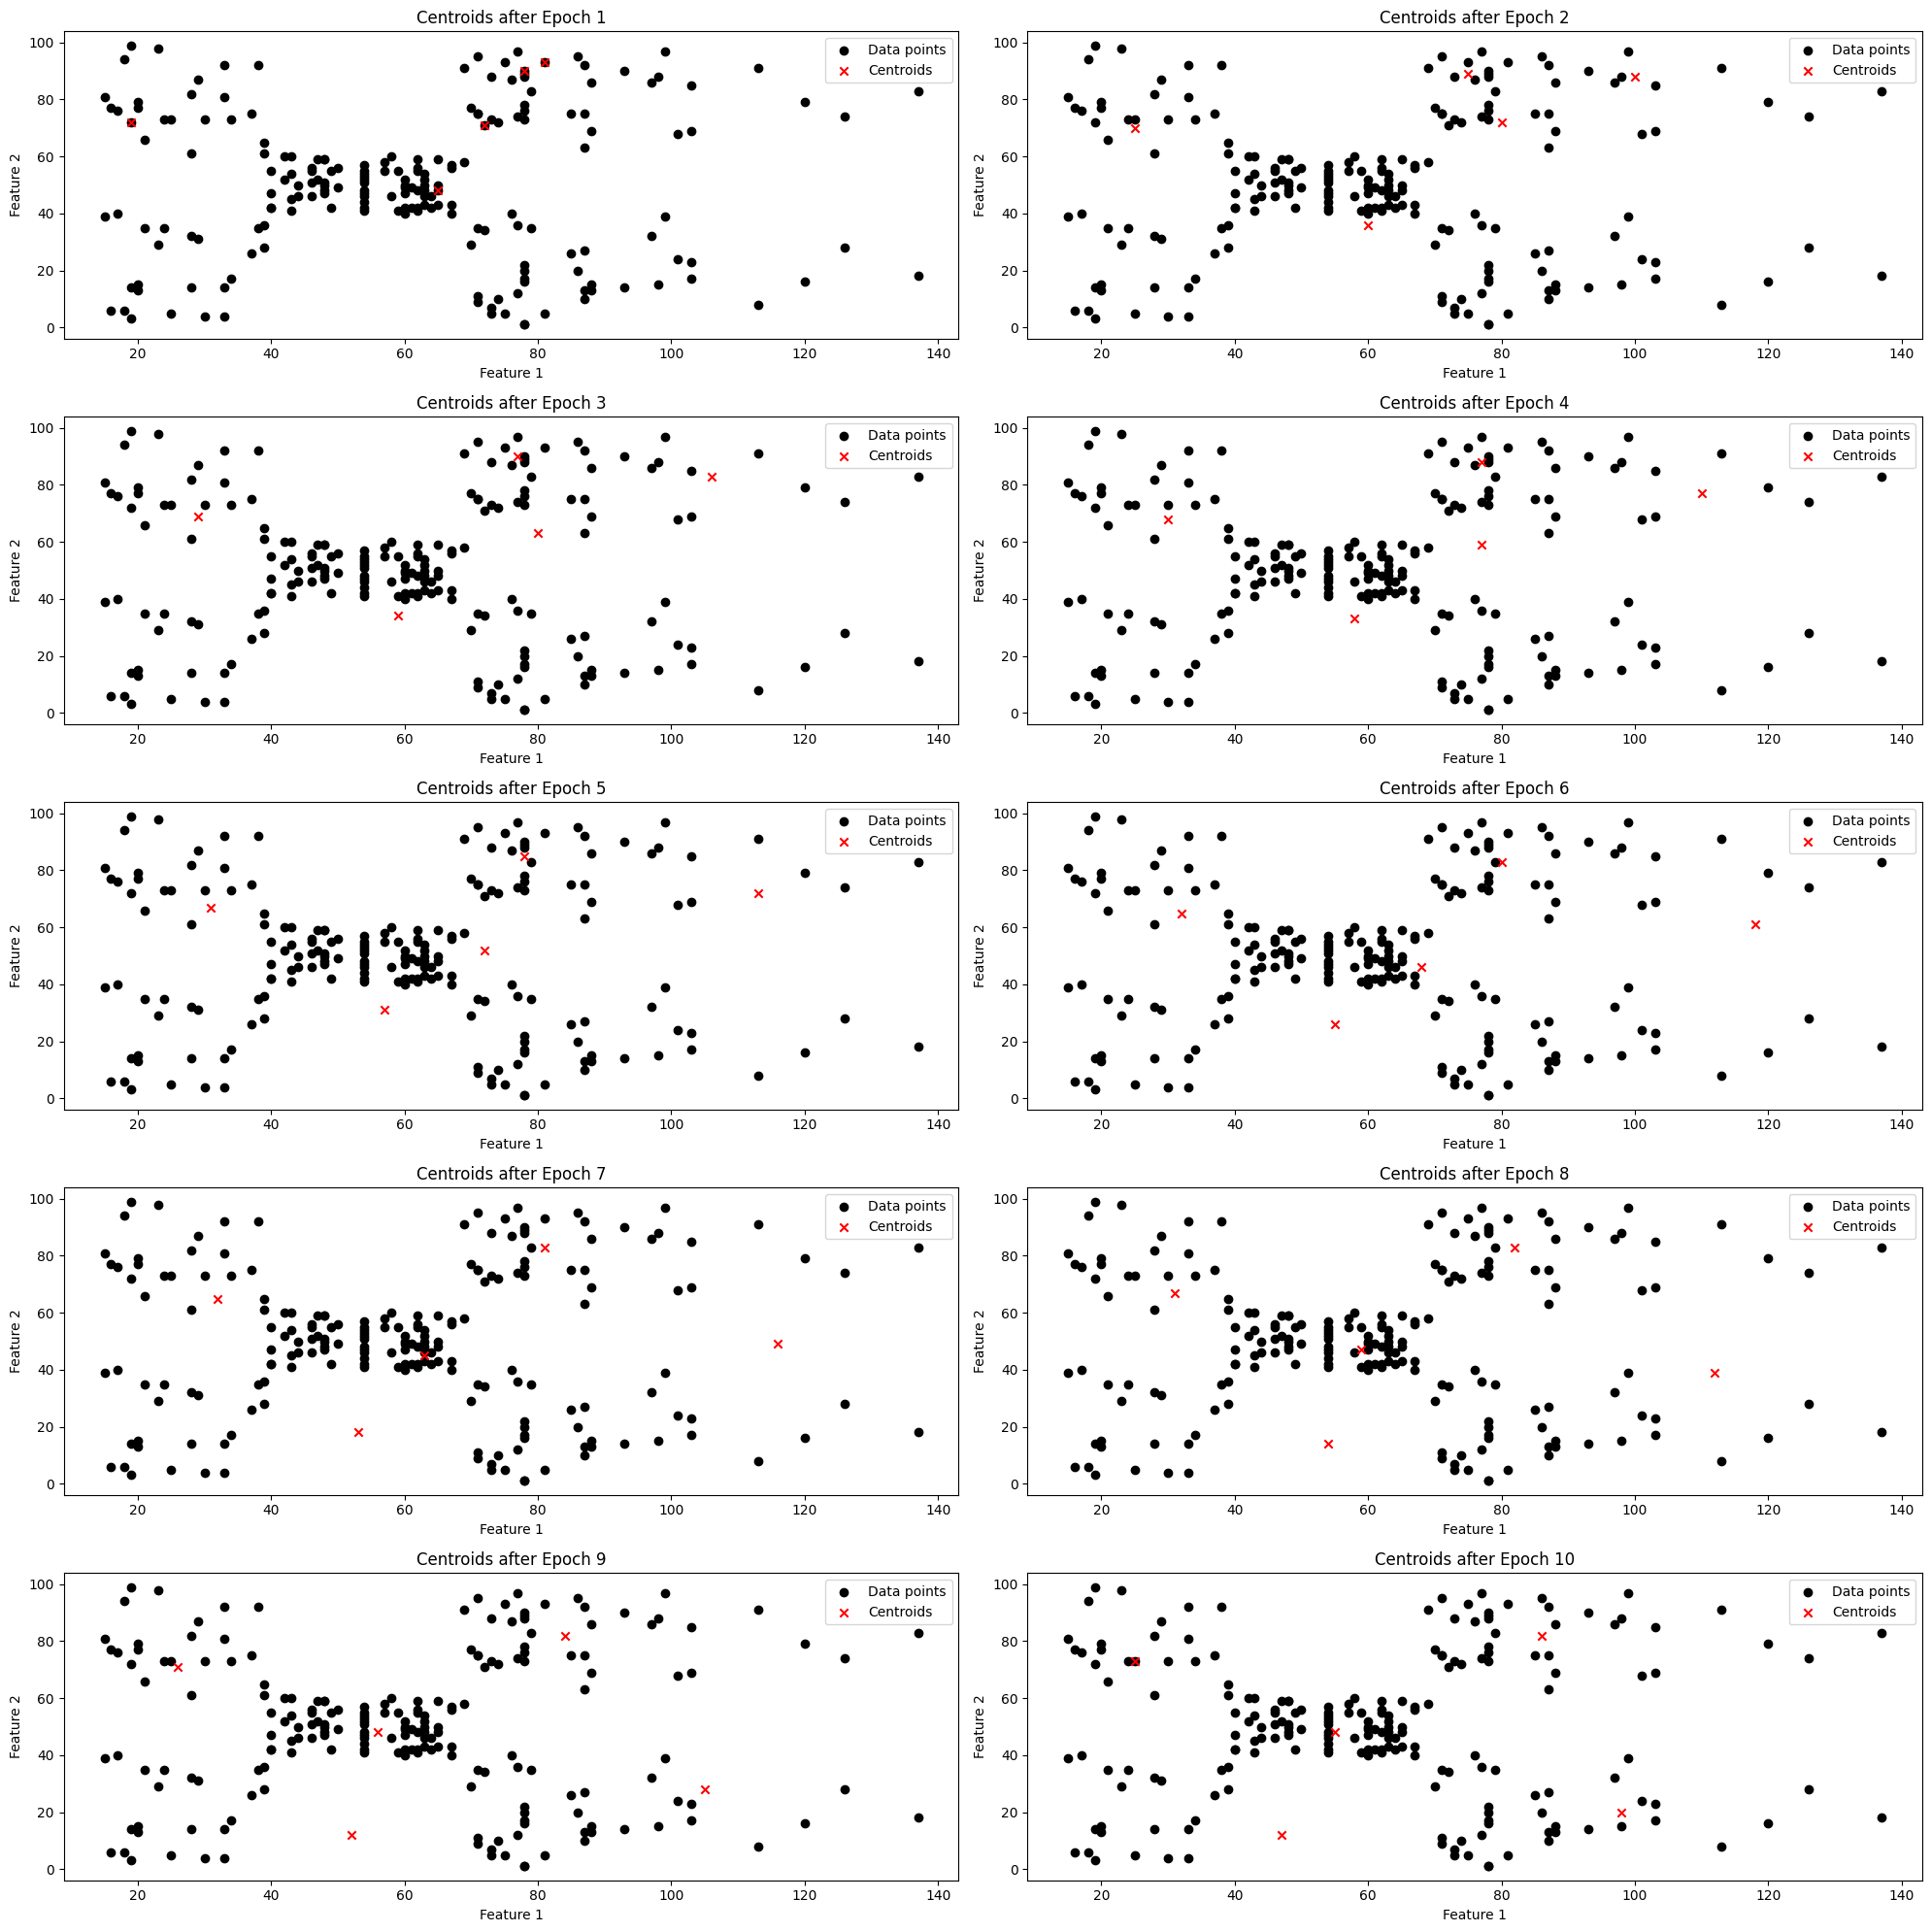

In [102]:
# Run K-means for k=5 and get the centroids after each epoch
clusters, centroids, centroids_history = k_means(X, k=5, metric='euclidean')
plot_centroids_history(X, centroids_history, num_epochs=10)

K-Means Clustering using Manhattan distance

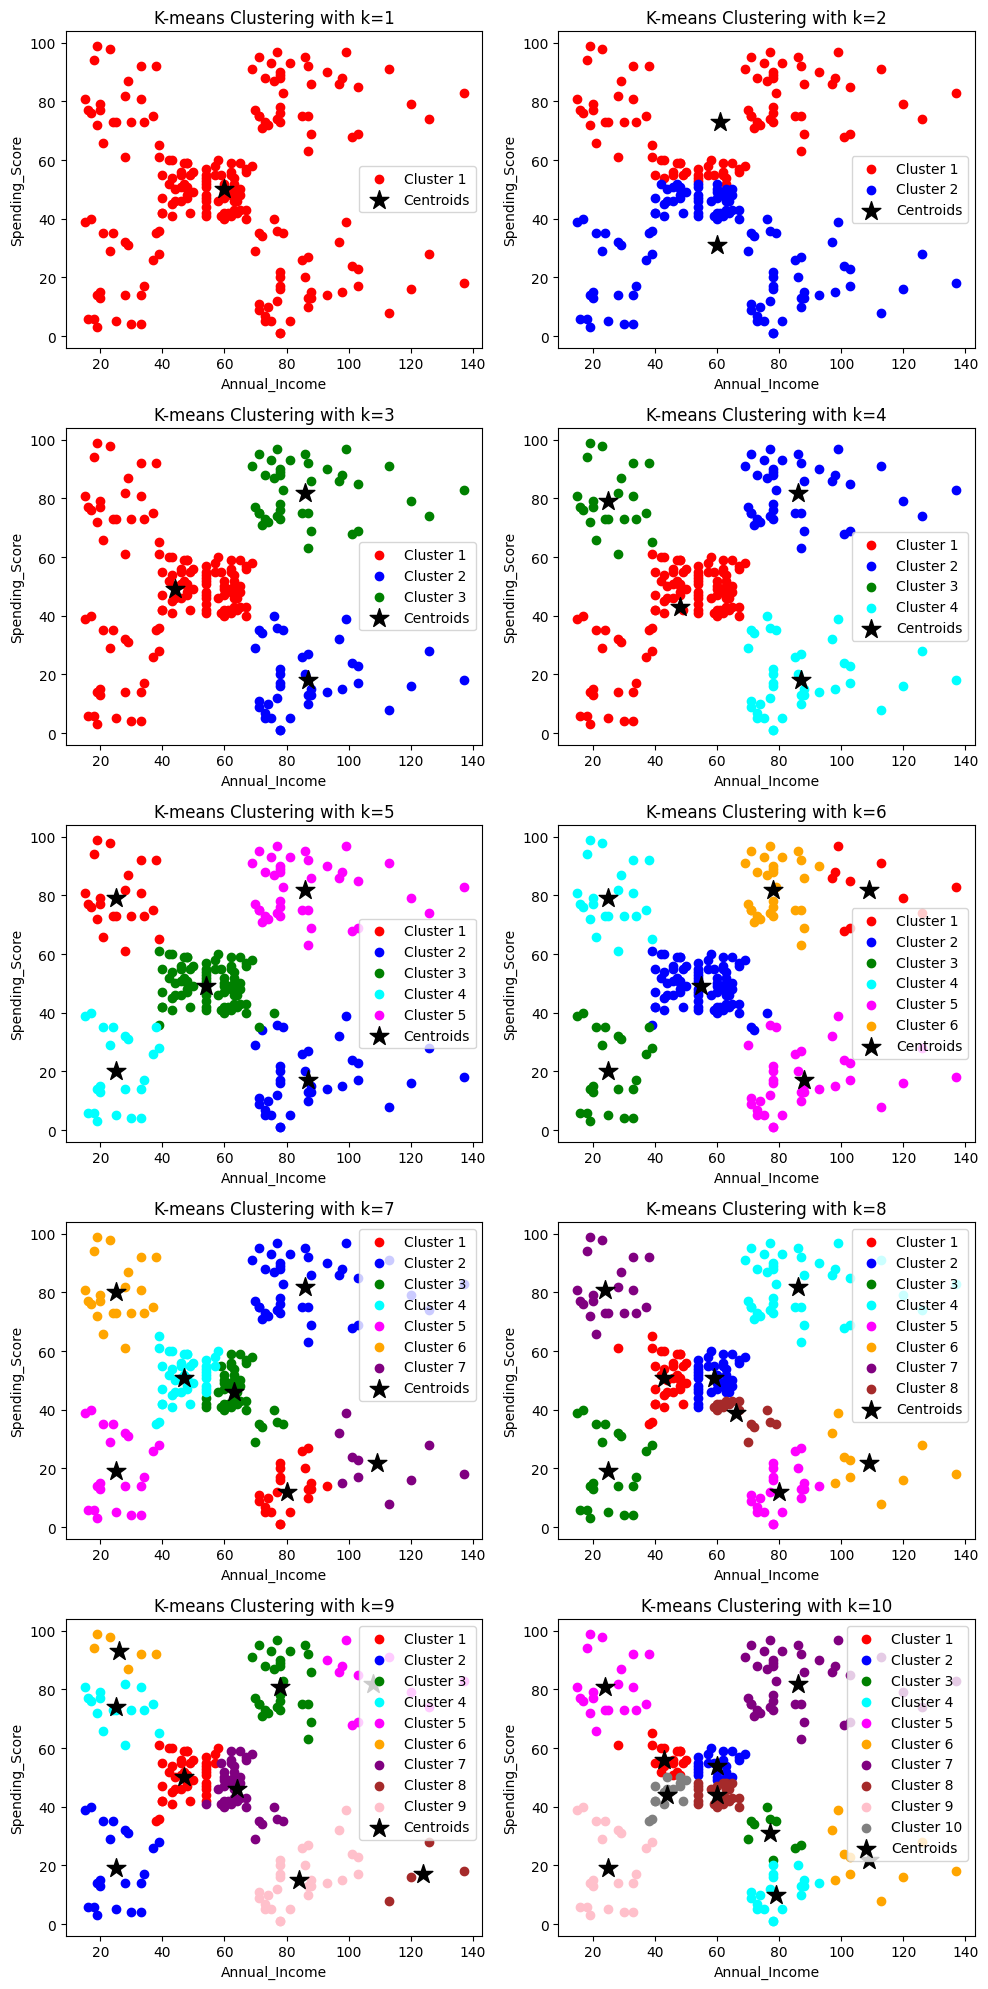

In [103]:
# PLotting for different k values for manhattan distance
plot_kmeans_clusters(X, metric='manhattan')

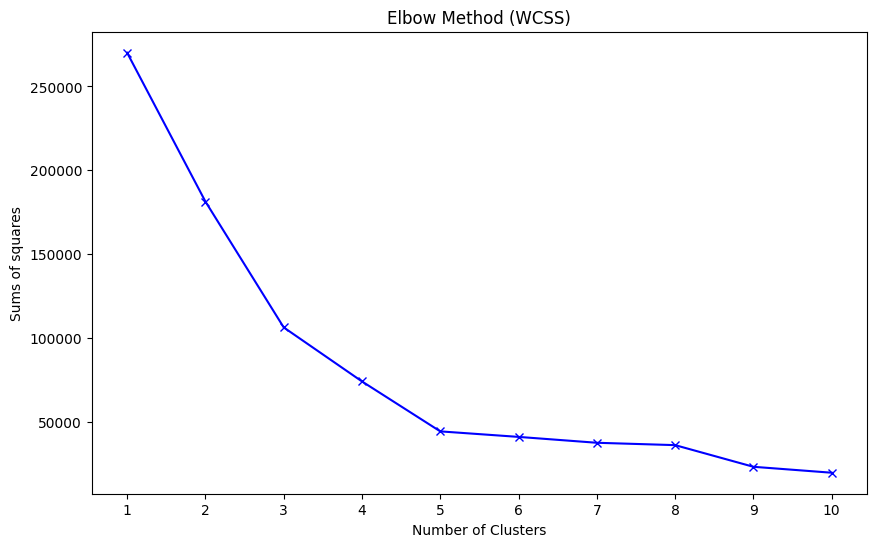

In [104]:
# plotting for different k values for sum of square error
elbow_method(X, max_k=10, metric='manhattan', evaluation_method='wcss')

Skipping Silhouette Coefficient calculation for k=1 due to insufficient unique labels.


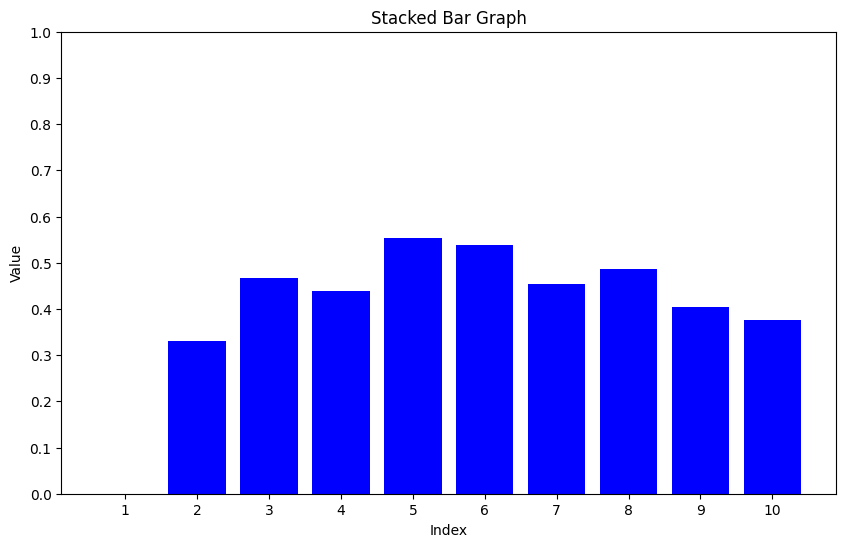

In [105]:
#  plotting for different k values for silhouette coefficient
elbow_method(X, max_k=10, metric='manhattan', evaluation_method='silhouette')

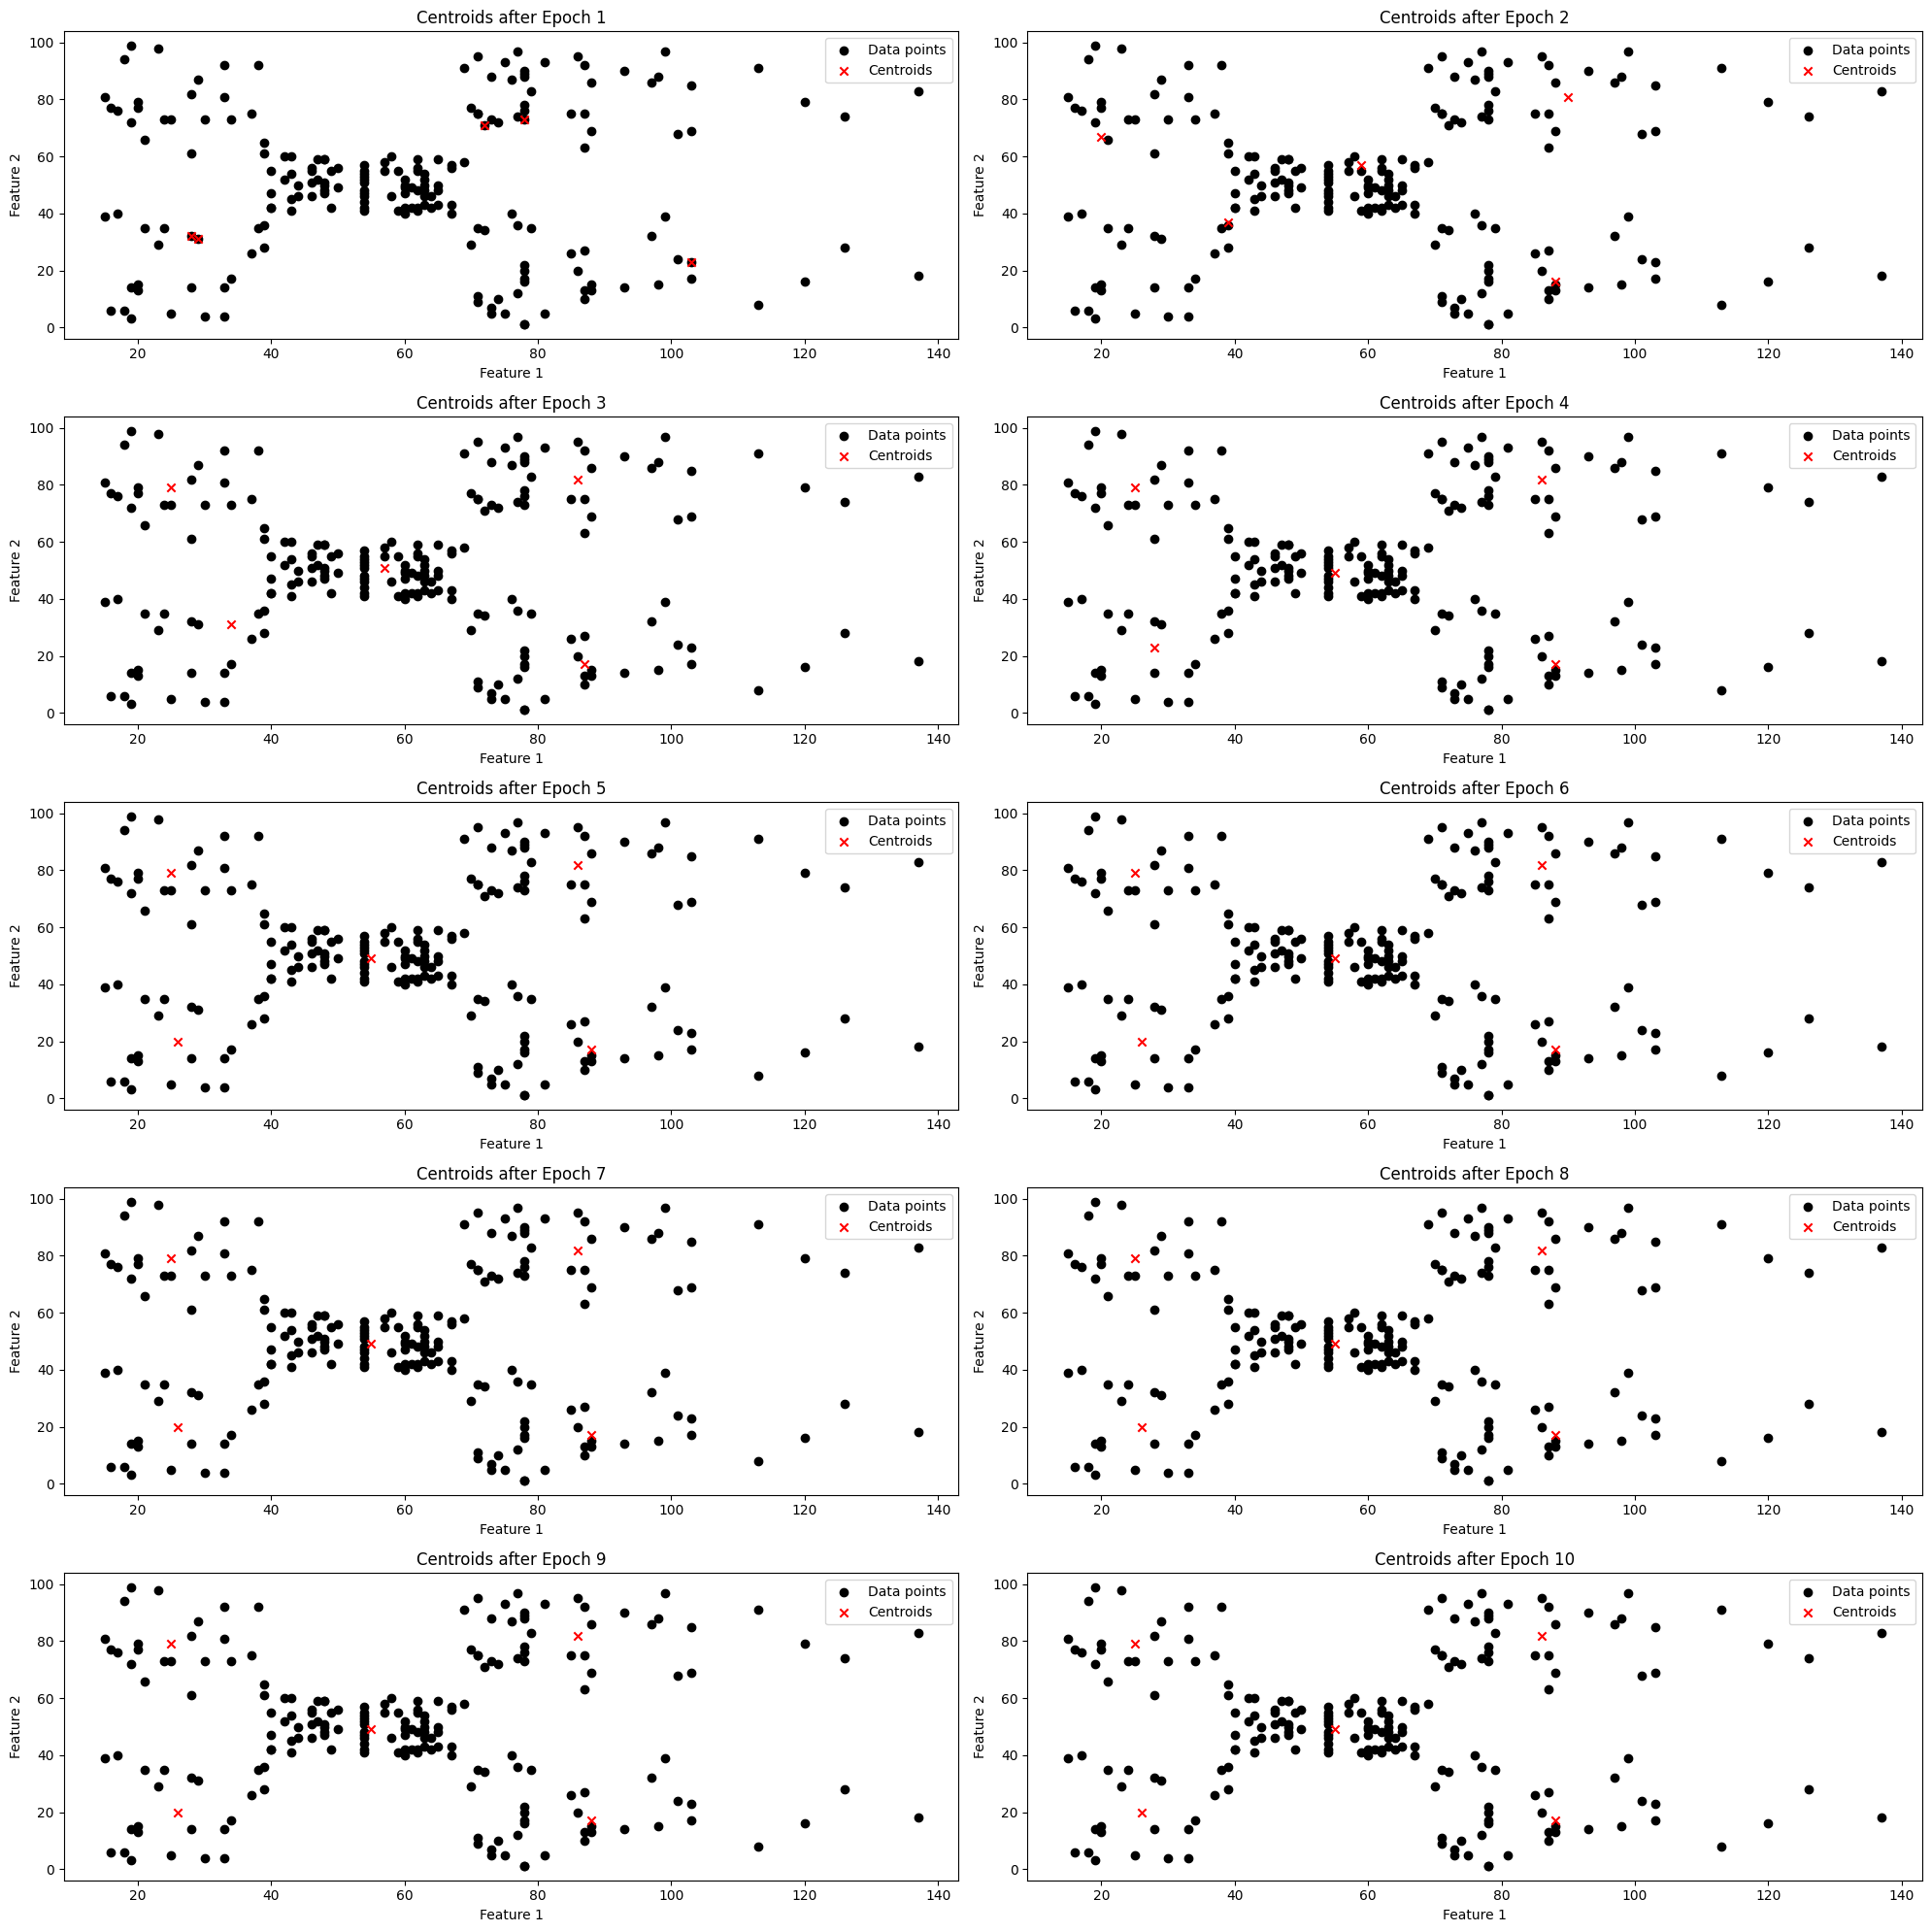

In [106]:
# plotting each epoch for k=5 for manhattan distance
clusters, centroids, centroids_history = k_means(X, k=5, metric='manhattan')
plot_centroids_history(X, centroids_history, num_epochs=10)

KMeans Clustering using squared euclidean distance measure

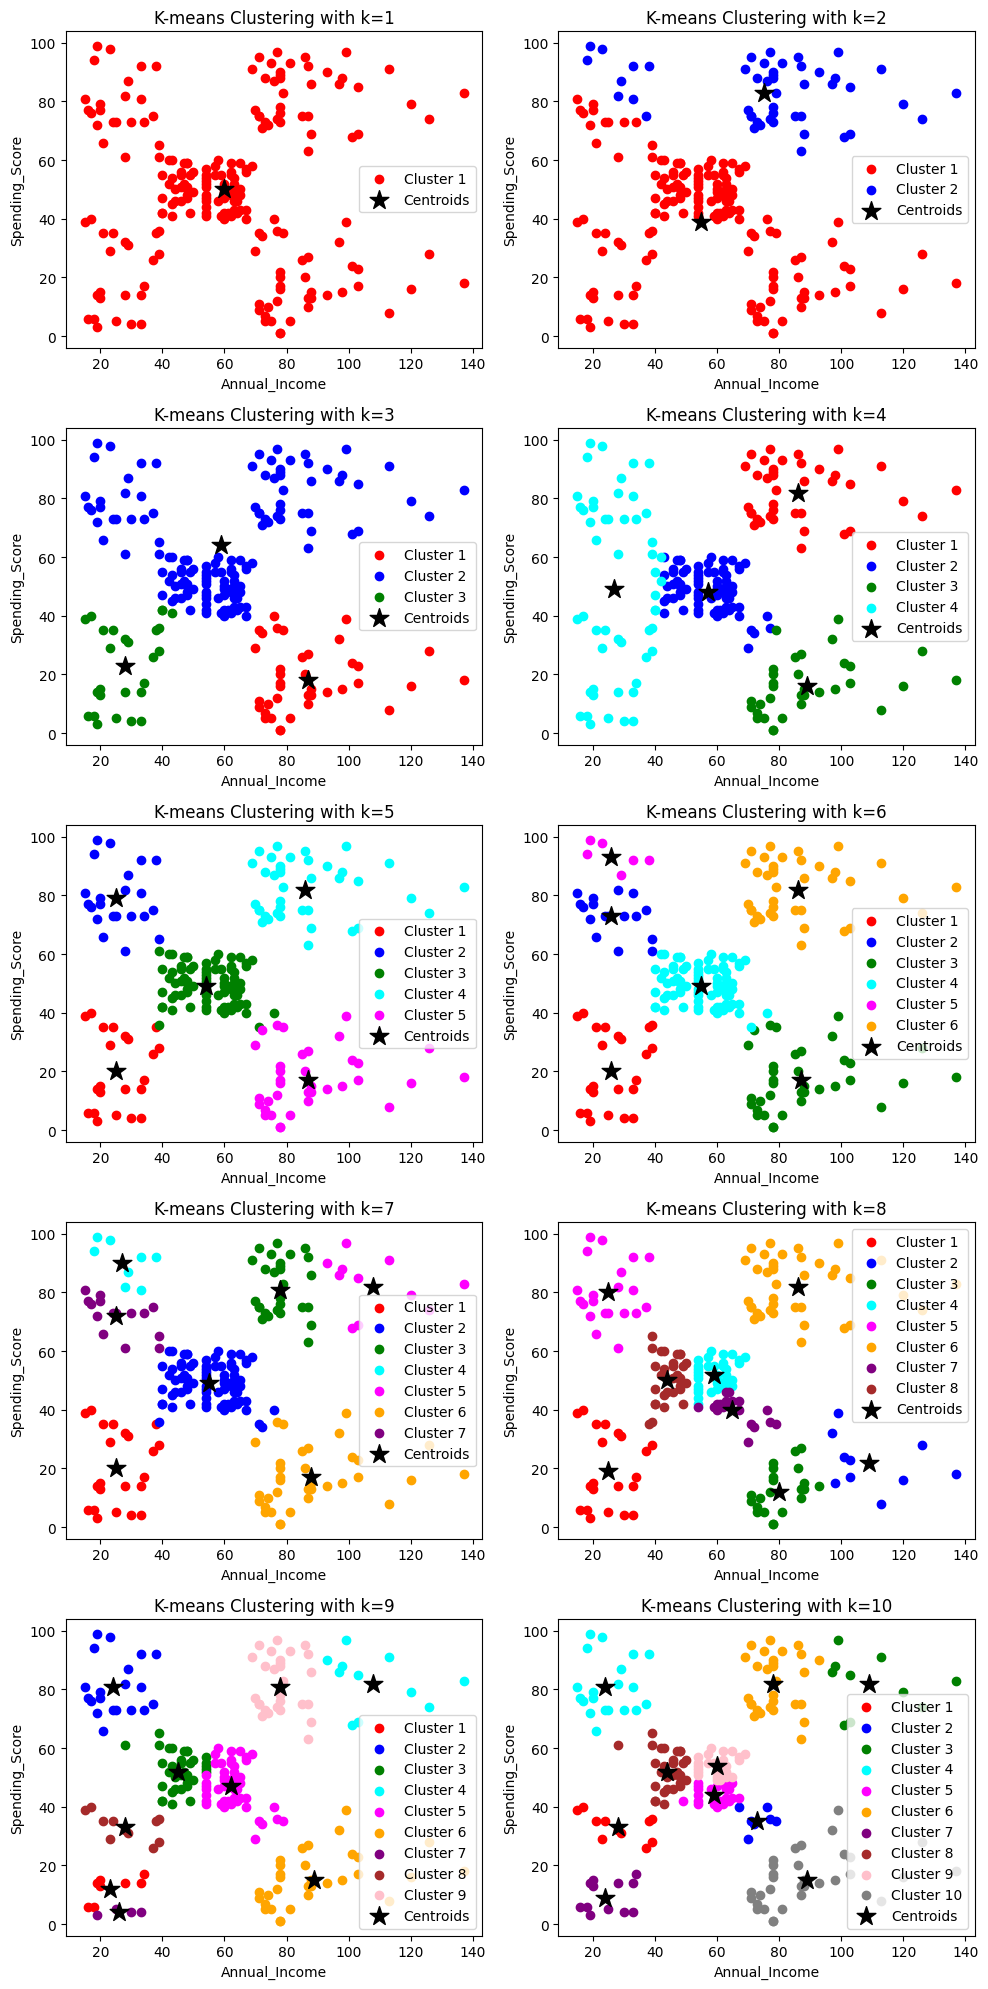

In [107]:
# plotting for different k values for squared euclidian distance
plot_kmeans_clusters(X, metric='squared_euclidean')

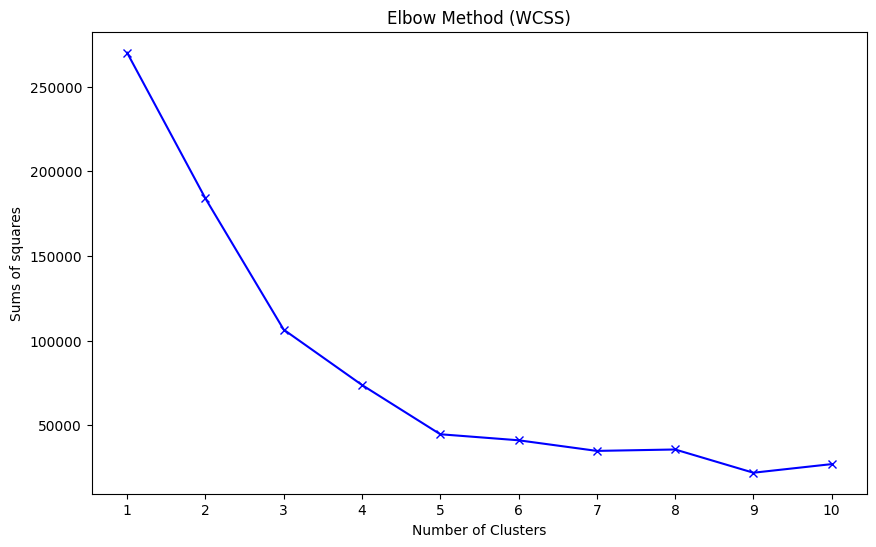

In [108]:
# plotting for different k values for sum of square error
elbow_method(X, max_k=10, metric='squared_euclidean', evaluation_method='wcss')

Skipping Silhouette Coefficient calculation for k=1 due to insufficient unique labels.


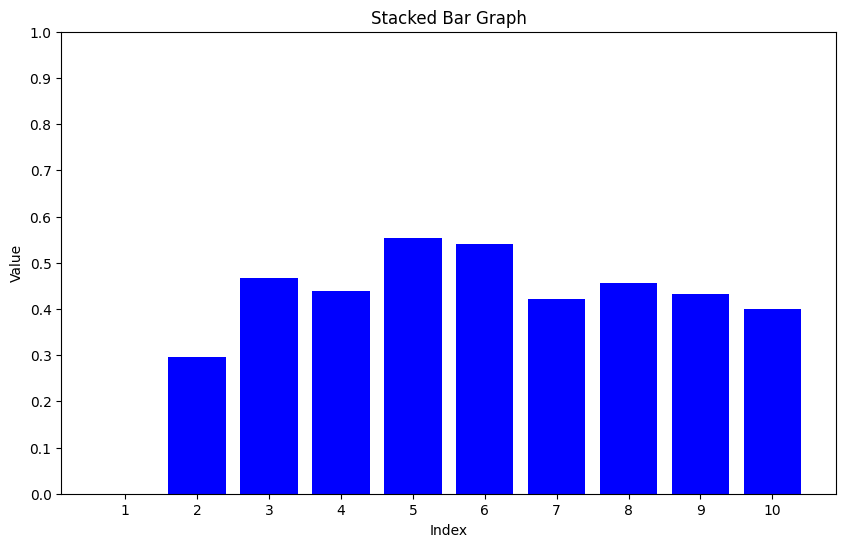

In [109]:
# plotting for different k values for silhouette coefficient
elbow_method(X, max_k=10, metric='squared_euclidean', evaluation_method='silhouette')

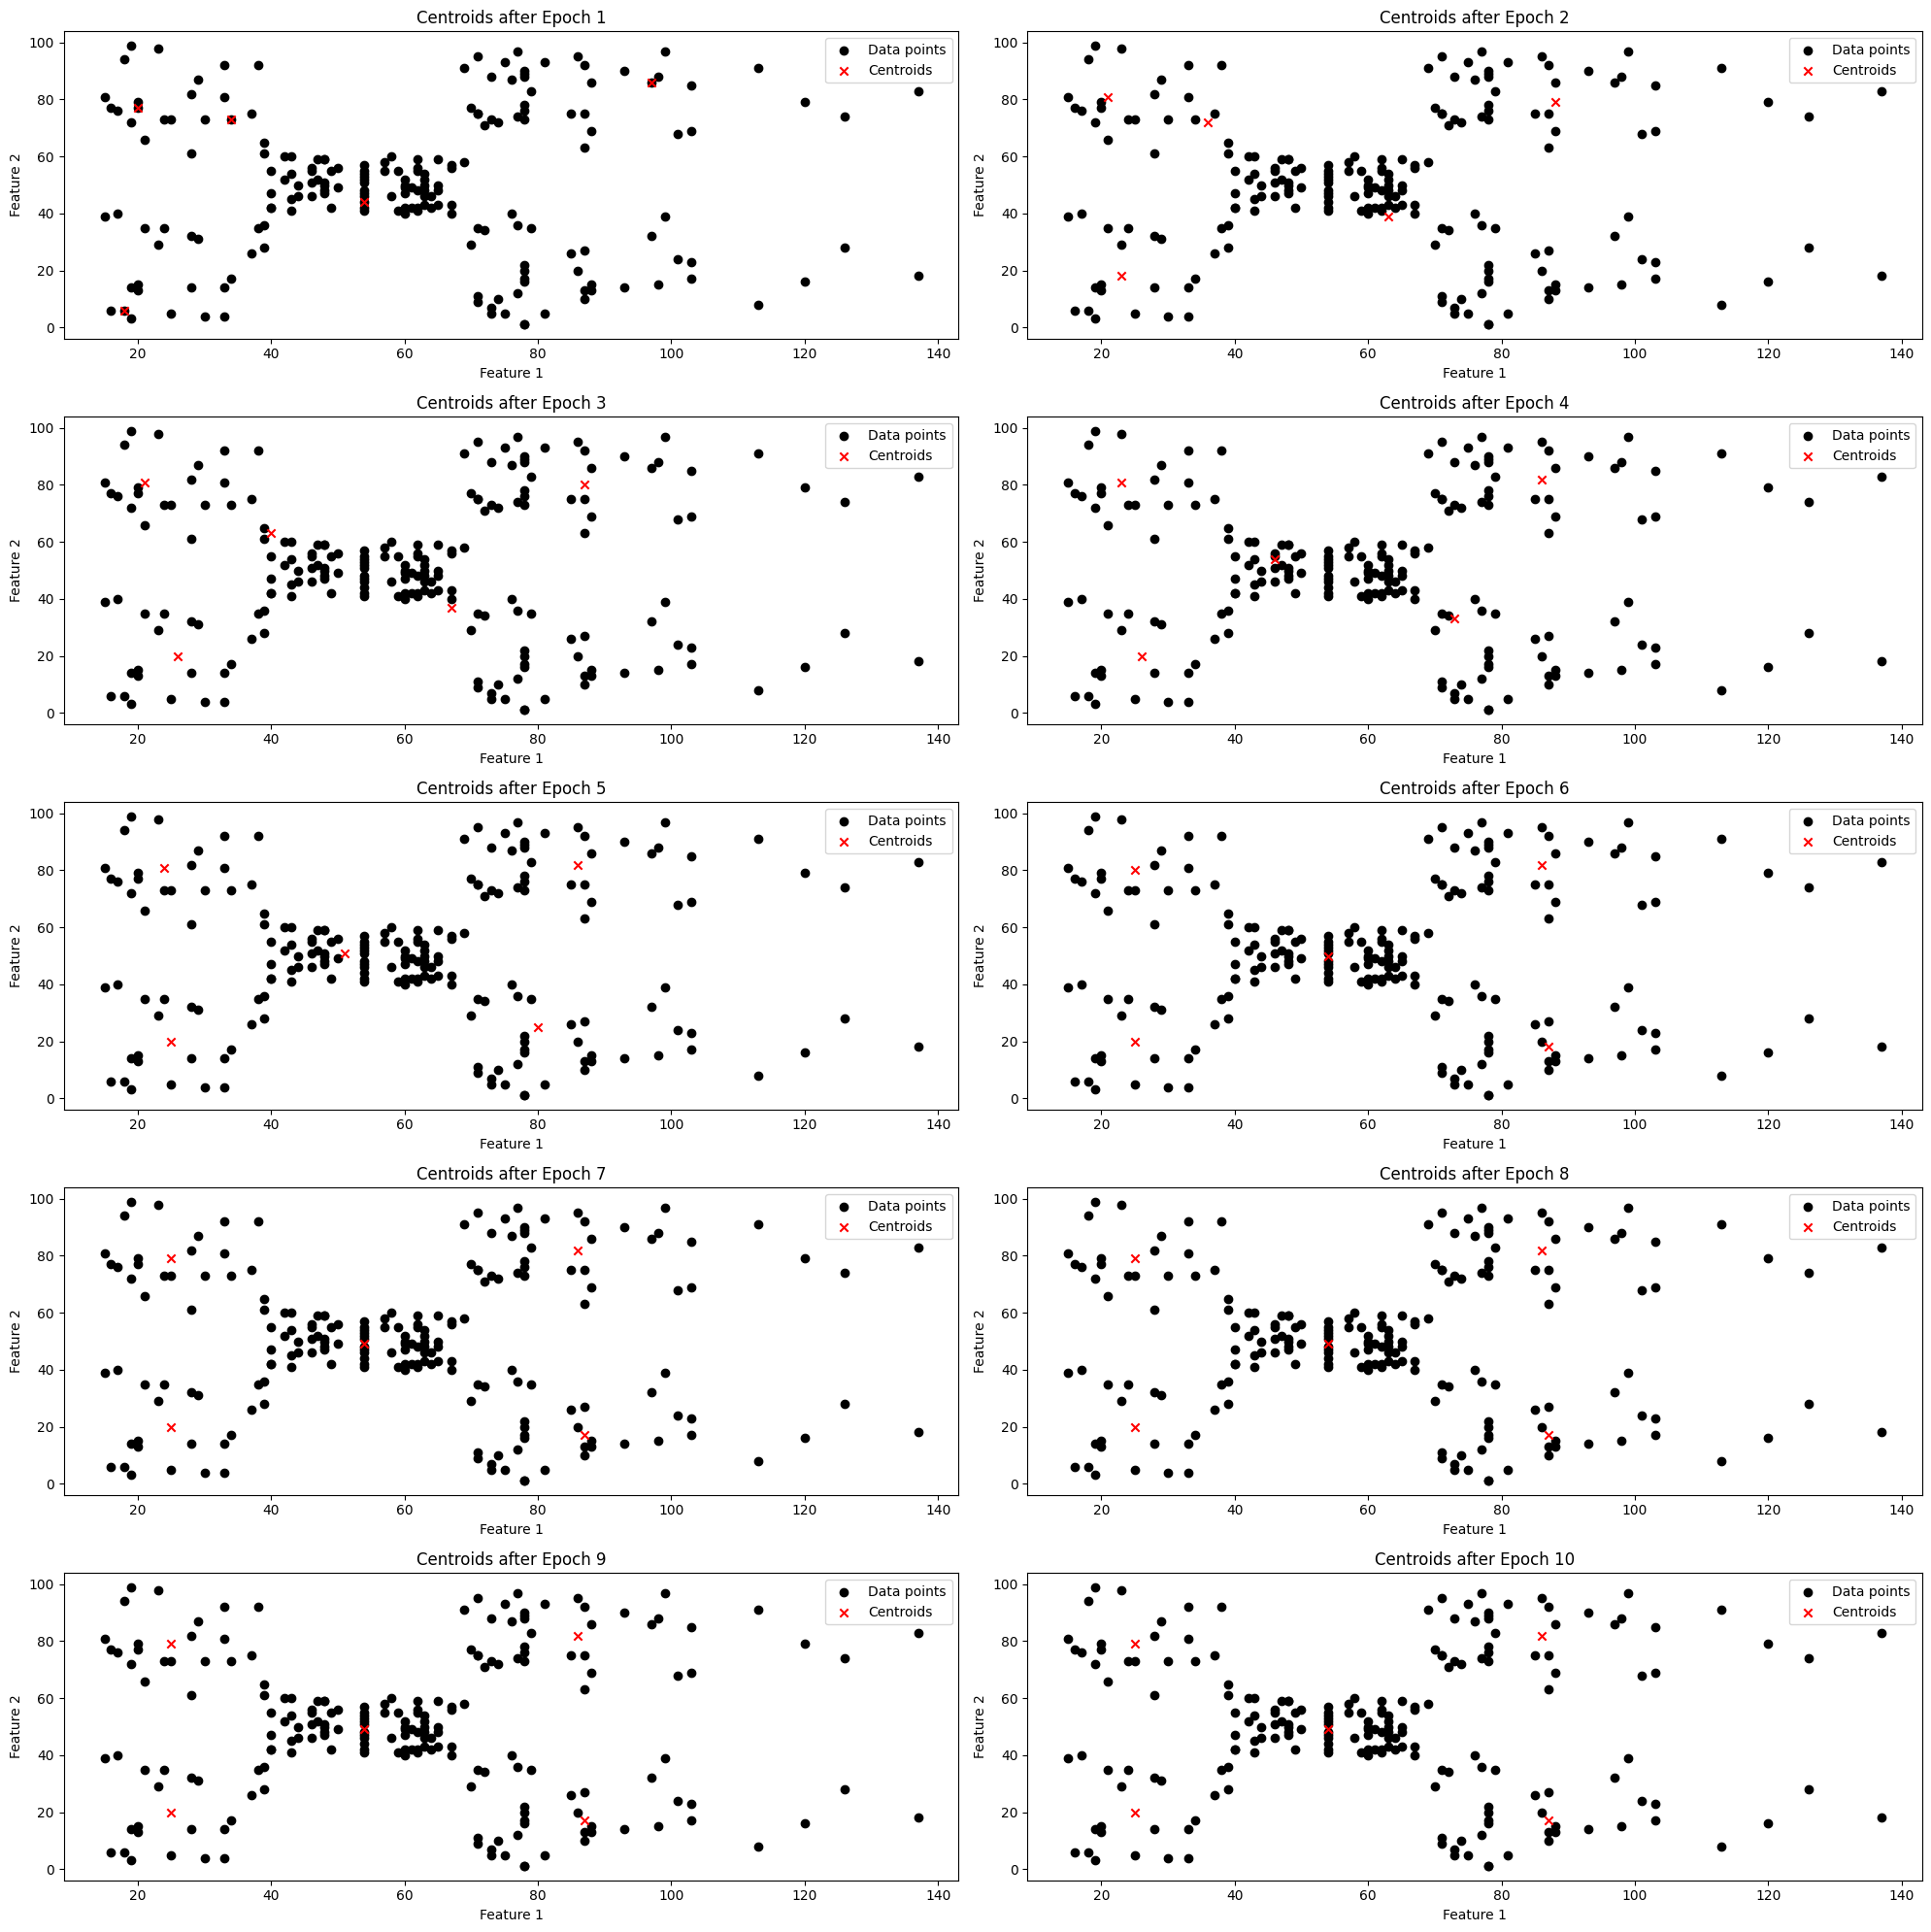

In [110]:
# plotting each epoch for k=5 for squared euclidian distance
clusters, centroids, centroids_history = k_means(X, k=5, metric='squared_euclidean')
plot_centroids_history(X, centroids_history, num_epochs=10)

KMeans Clustering for Cosine distance measure

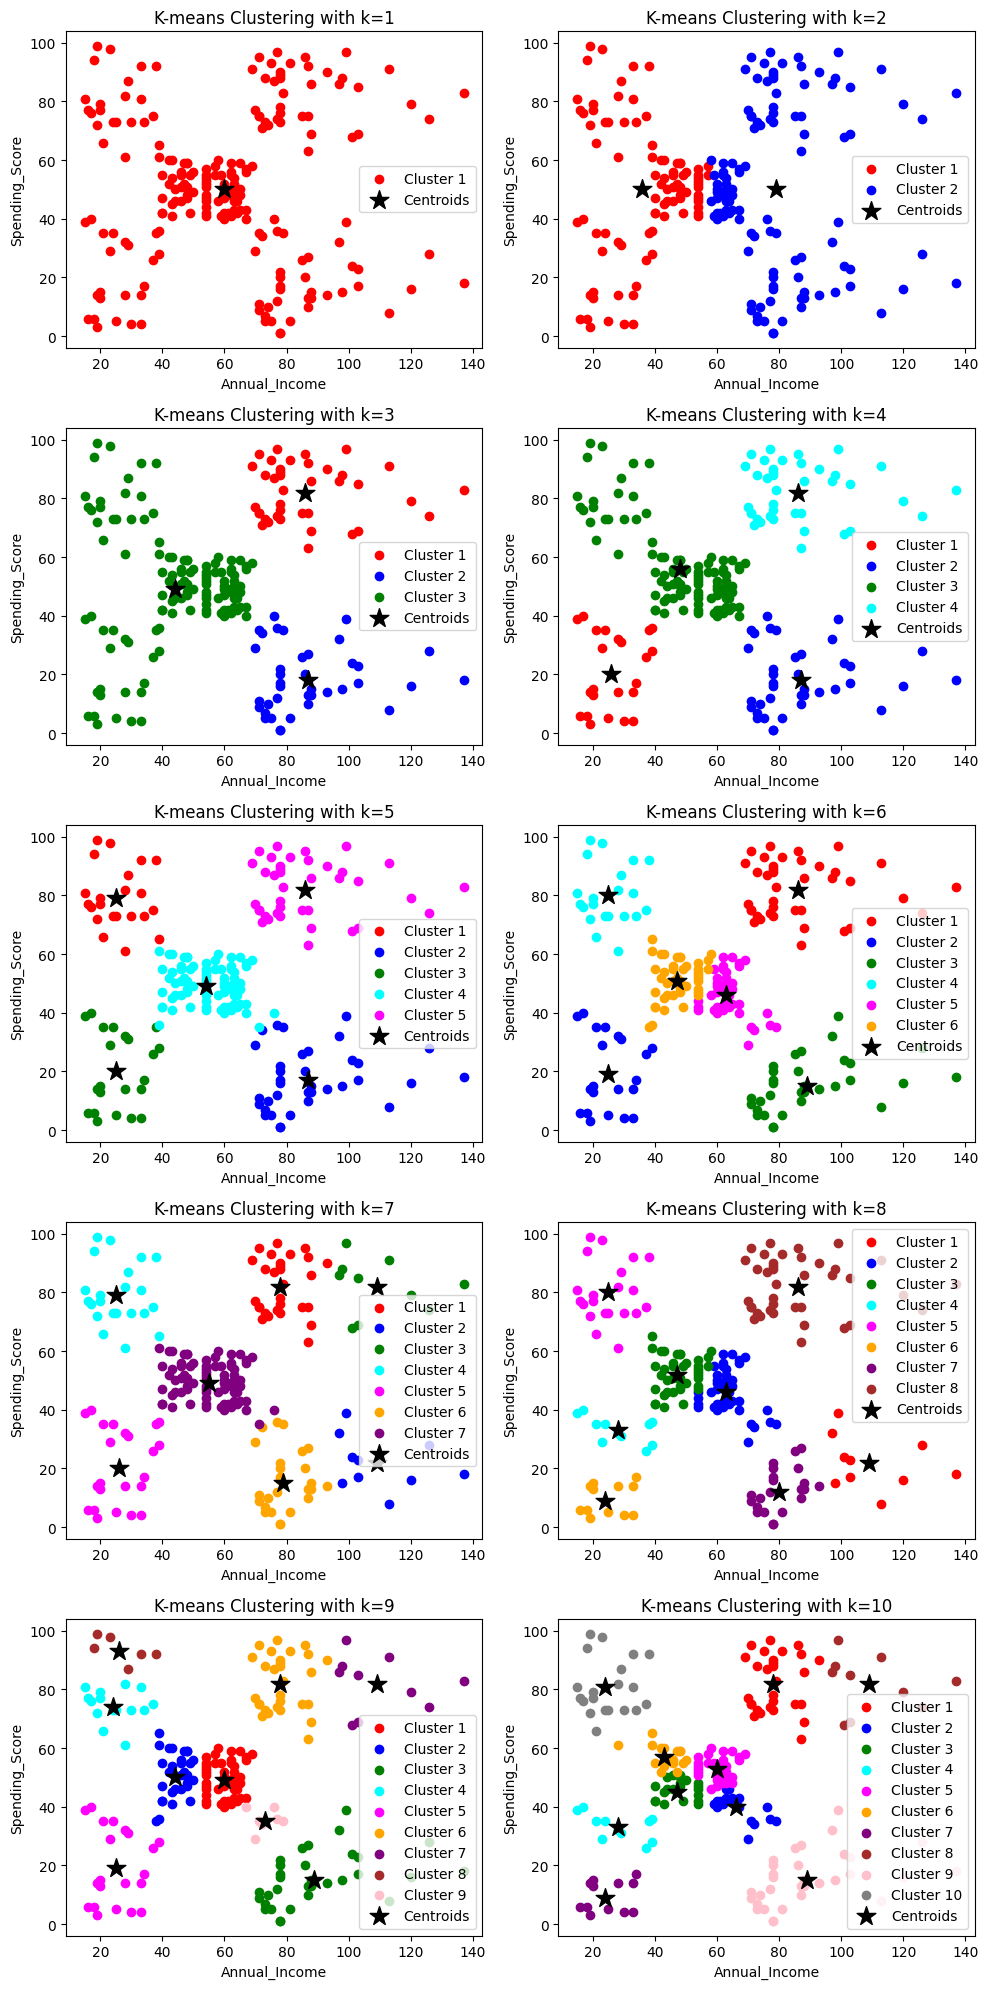

In [111]:
# plotting for different k values for cosine distance
plot_kmeans_clusters(X, metric='cosine')

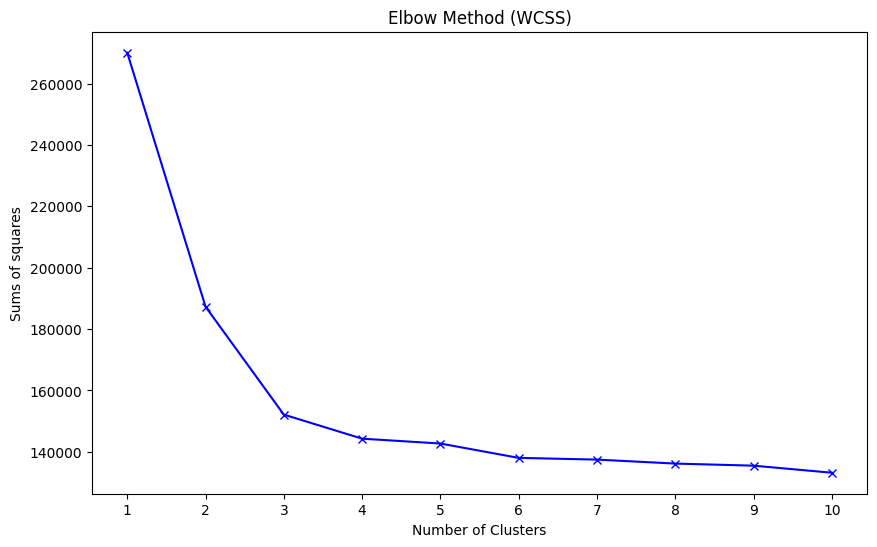

In [112]:
# plotting for different k values for sum of square error
elbow_method(X, max_k=10, metric='cosine', evaluation_method='wcss')

Skipping Silhouette Coefficient calculation for k=1 due to insufficient unique labels.


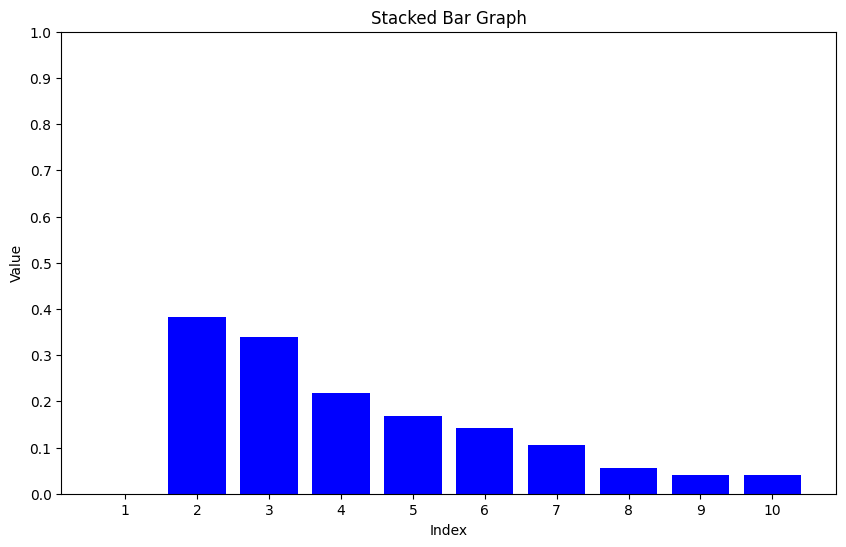

In [113]:
# plotting for different k values for silhouette coefficient
elbow_method(X, max_k=10, metric='cosine', evaluation_method='silhouette')

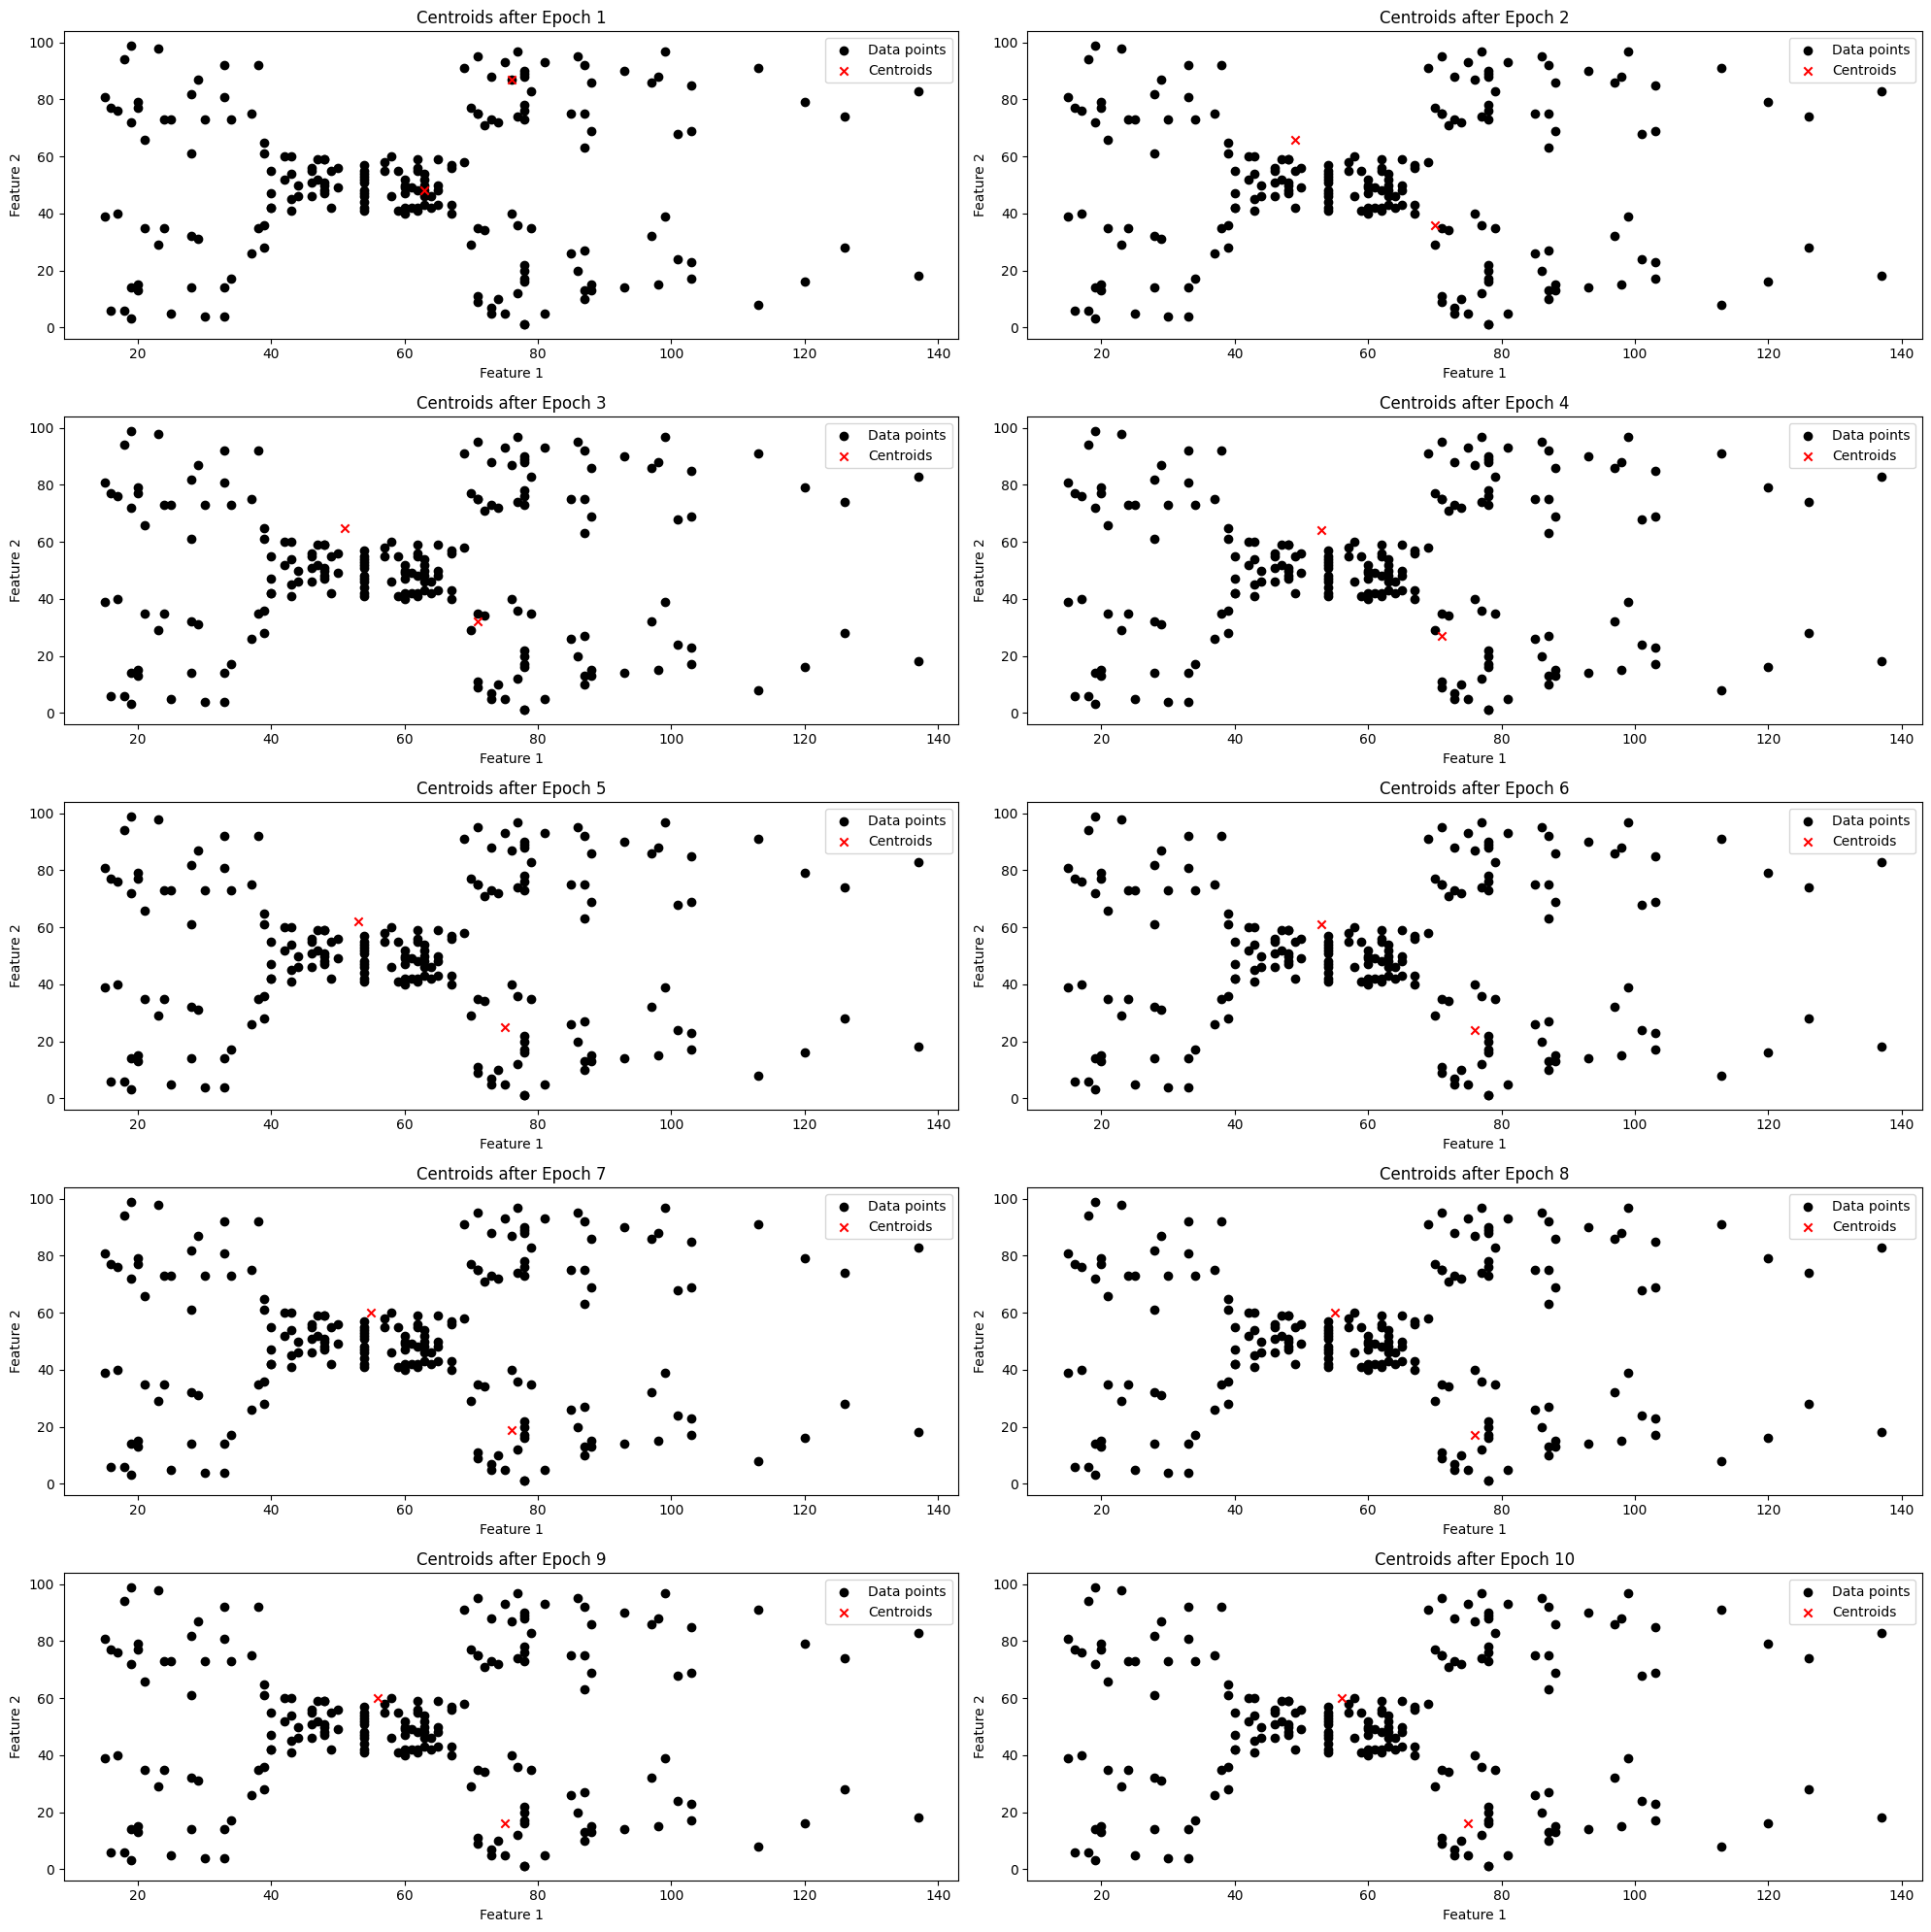

In [114]:
# plotting each epoch for k=2 for cosine distance
clusters, centroids, centroids_history = k_means(X, k=2, metric='cosine')
plot_centroids_history(X, centroids_history, num_epochs=10)

Thank You Ma'am